# Figure 3E-4EG-5F

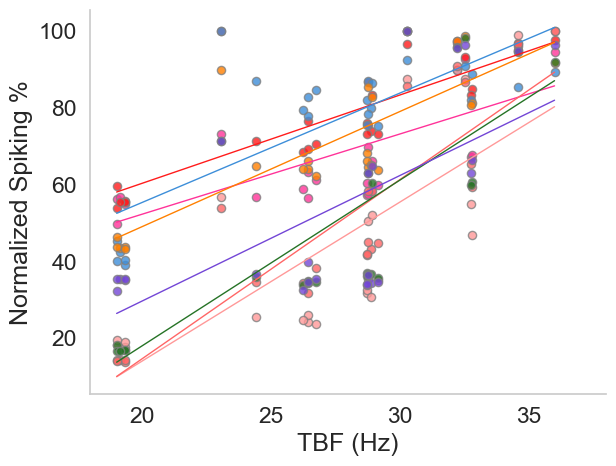

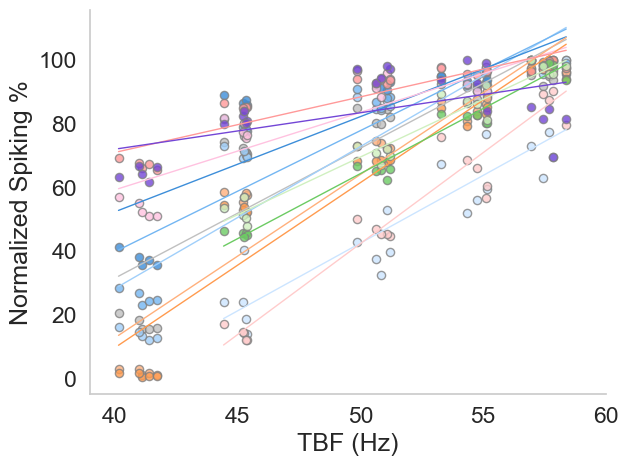

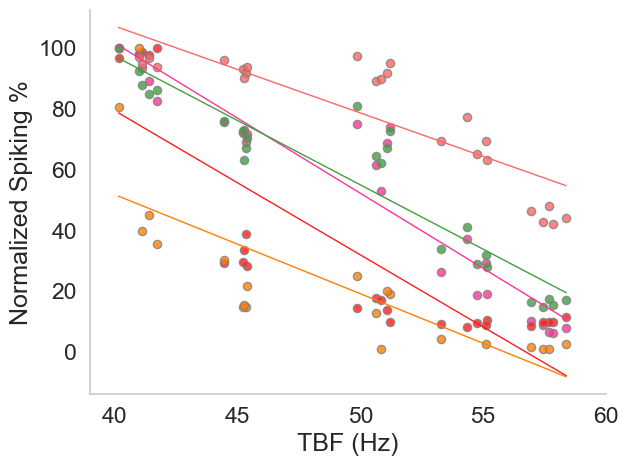

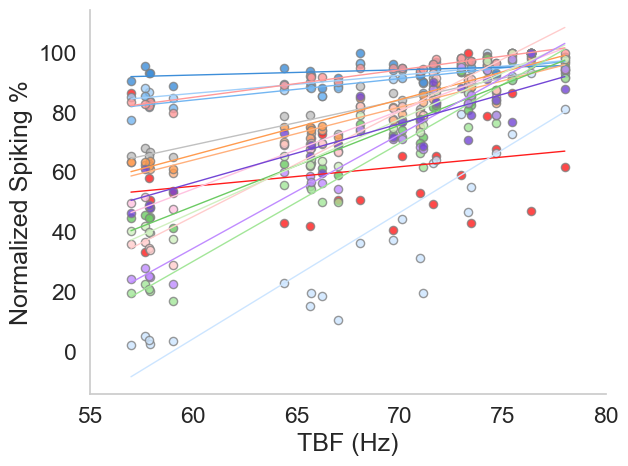

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from CrossCorr.Const import CELL_POOL_COLOR, NETWORK_POOLS


modes = ["slow", "inter","inter", "fast"]
poolFinder = [1,7, 8,5]

for i in range(4): 
    pools = NETWORK_POOLS[poolFinder[i]]
    mode = modes[i]

    recruitment = pd.read_csv("10Somite_Scale_NormalizedSpiking.csv") # select * FROM NormalizedSpiking where model like '%10 Somite%' and model like '%scale%'

    filtered_data = recruitment[(recruitment['Pool'].isin(pools)) & (recruitment['Model'].str.contains(mode, case=False))]
    lower_TBF_limit = math.floor(filtered_data["TBF"].min()) - 1
    upper_TBF_limit = math.ceil(filtered_data["TBF"].max()) + 1
    sns.set_theme(style="whitegrid", font_scale=1.5)
    
    sns.lmplot(data=filtered_data, x='TBF', y='NormSpike', hue='Pool', palette=CELL_POOL_COLOR, 
            scatter_kws={'s': 35, 'edgecolor': 'gray'}, 
            line_kws={'linewidth': 1}, ci=None, legend=False, aspect=1.3, height=5) 
    #work on legend - remove label (Pool) and make the dots larger
    plt.xlim(lower_TBF_limit, upper_TBF_limit)
    plt.xlabel("TBF (Hz)")
    plt.ylabel("Normalized Spiking %")
    plt.title("")
    plt.grid(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()